# Elden Ring Weapons Analytics

### Project imports

In [1]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

### Search for weapons

#### All weapons

In [2]:
db = pd.read_csv("elden_ring_weapon.csv")
db

,Name,Type,Physic Damage,Magic Damage,Fire Damage,Light Damage,Holy Damage,Crit Damage,Stamina,Str,...,Special Effect Damage,Physic Blocking,Magic Blocking,Fire Blocking,Light Blocking,Holy Blocking,Boost,Rest,Weight,Upgrade Material
0,Academy Glintstone Staff,Glintstone Staff,43,-,-,-,-,100,40,D,...,-,25,15,15,15,15,15,10,3.0,Smithing Stones
1,Alabaster Lord's Sword,Greatsword,313,93,-,-,-,100,126,B,...,-,56,33,27,27,27,39,19,8.0,Somber Smithing Stones
2,Albinauric Bow,Bow,200,-,-,-,-,100,60,E,...,-,-,-,-,-,-,-,-,4.5,Smithing Stones
3,Albinauric Staff,Glintstone Staff,29,-,-,-,-,100,38,D,...,-,23,14,14,14,14,14,9,2.5,Smithing Stones
4,Antspur Rapier,Thrusting Sword,240,-,-,-,-,100,62,D,...,(55),47,31,31,31,31,25,10,3.0,Smithing Stones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,Wing of Astel,Curved Sword,159,191,-,-,-,100,84,E,...,-,28,52,23,23,23,23,9,2.5,Somber Smithing Stones
303,Winged Greathorn,Greataxe,318,-,-,-,-,100,150,C,...,-,65,35,35,35,35,42,20,11.0,Somber Smithing Stones
304,Winged Scythe,Reaper,213,-,-,-,254,100,110,D,...,(55),30,25,25,25,55,30,15,7.5,Somber Smithing Stones
305,Zamor Curved Sword,Curved Greatsword,306,-,-,-,-,100,128,C,...,(65),61,33,33,33,33,39,19,9.0,Somber Smithing Stones


##### Weapon types

In [3]:
wt = db["Type"].unique()
wt

array(['Glintstone Staff', 'Greatsword', 'Bow', 'Thrusting Sword',
       'Crossbow', 'Colossal Weapon', 'Greataxe', 'Curved Sword',
       'Halberd', 'Flail', 'Axe', 'Warhammer', 'Torch',
       'Curved Greatsword', 'Dagger', 'Claw', 'Heavy Thrusting Sword',
       'Spear', 'Straight Sword', 'Fist', 'Sacred Seal', 'Hammer',
       'Light Bow', 'Katana', 'Twinblade', 'Greatbow', 'Whip',
       'Colossal Sword', 'Reaper', 'Ballista', 'Great Spear'],
      dtype=object)

#### Advanced Search

##### Weapon type:

In [4]:
# Créer un menu déroulant
dropdown = widgets.Dropdown(
    options=wt,
    description="Weapon Type",
    style={'description_width': 'initial'}
)

# Fonction pour afficher les armes filtrées
def PrintWeapons(SelectedType):
    filteredWeapons = db[db["Type"] == SelectedType].drop(columns=["Type"])
    display(HTML(filteredWeapons.to_html(index=False)))
    # Appliquer un style CSS pour limiter la largeur du tableau
    display(HTML("""
        <style>
            table { width: 100%; display: block; overflow-x: auto; }
            th, td { padding: 5px; text-align: left; white-space: nowrap; }
        </style>
    """))

# Lier la fonction au widget
widgets.interactive(PrintWeapons, SelectedType=dropdown)

interactive(children=(Dropdown(description='Weapon Type', options=('Glintstone Staff', 'Greatsword', 'Bow', 'T…

##### Weapon Scaling:

In [5]:
sc = db["Str"].unique()
sct = ["Str", "Dex", "Int", "Fai", "Arc"]

# Créer un menu déroulant
dropdown = widgets.Dropdown(
    options=sc,
    description="Weapon Scalling",
    style={'description_width': 'initial'}
)

dropdown2 = widgets.Dropdown(
    options=sct,
    description="Weapon Type Scalling",
    style={'description_width': 'initial'}
)

# Fonction pour afficher les armes filtrées
def PrintScalling(SelectedScalling, SelectedScallingType):
    filteredWeapons = db[db[SelectedScallingType] == SelectedScalling]
    display(HTML(filteredWeapons.to_html(index=False)))
    # Appliquer un style CSS pour limiter la largeur du tableau
    display(HTML("""
        <style>
            table { width: 100%; display: block; overflow-x: auto; }
            th, td { padding: 5px; text-align: left; white-space: nowrap; }
        </style>
    """))

# Lier la fonction au widget
widgets.interactive(PrintScalling, SelectedScalling=dropdown, SelectedScallingType=dropdown2)

interactive(children=(Dropdown(description='Weapon Scalling', options=('D', 'B', 'E', '-', 'C', 'A', 'S'), sty…

##### Damage Type: 

In [6]:
dt = ["Physic Damage", "Magic Damage", "Fire Damage", "Light Damage", "Holy Damage"]

# Créer un menu déroulant
dropdown = widgets.Dropdown(
    options=dt,
    description="Weapon Damage Type",
    style={'description_width': 'initial'}
)

# Fonction pour afficher les armes filtrées
def PrintScalling(SelectedDamageType):
    filteredWeapons = db[db[SelectedDamageType] != "-"]
    display(HTML(filteredWeapons.to_html(index=False)))
    # Appliquer un style CSS pour limiter la largeur du tableau
    display(HTML("""
        <style>
            table { width: 100%; display: block; overflow-x: auto; }
            th, td { padding: 5px; text-align: left; white-space: nowrap; }
        </style>
    """))

# Lier la fonction au widget
widgets.interactive(PrintScalling, SelectedDamageType=dropdown)

interactive(children=(Dropdown(description='Weapon Damage Type', options=('Physic Damage', 'Magic Damage', 'Fi…

#### Top 5

In [7]:
dt = ["Physic Damage", "Magic Damage", "Fire Damage", "Light Damage", "Holy Damage", "Stamina", "Crit Damage", "Weight"]

# Créer un menu déroulant
dropdown = widgets.Dropdown(
    options=dt,
    description="Stat",
    style={'description_width': 'initial'}
)

checkbox = widgets.Checkbox(value=False, description="Asc")

# Fonction pour afficher les armes filtrées
def PrintScalling(SelectedStat, asc):
    db[SelectedStat] = pd.to_numeric(db[SelectedStat], errors="coerce")
    filteredWeapons = db.sort_values(by=SelectedStat, ascending=asc).head(5)
    display(HTML(filteredWeapons.to_html(index=False)))
    # Appliquer un style CSS pour limiter la largeur du tableau
    display(HTML("""
        <style>
            table { width: 100%; display: block; overflow-x: auto; }
            th, td { padding: 5px; text-align: left; white-space: nowrap; }
        </style>
    """))

# Lier la fonction au widget
widgets.interactive(PrintScalling, SelectedStat=dropdown, asc=checkbox)

interactive(children=(Dropdown(description='Stat', options=('Physic Damage', 'Magic Damage', 'Fire Damage', 'L…

### Mo' Analytics!

##### Weapon Type Quantity

C:\Users\hodow\AppData\Local\Temp\ipykernel_14876\2100400869.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=armes_par_type.index, x=armes_par_type.values, palette="coolwarm")


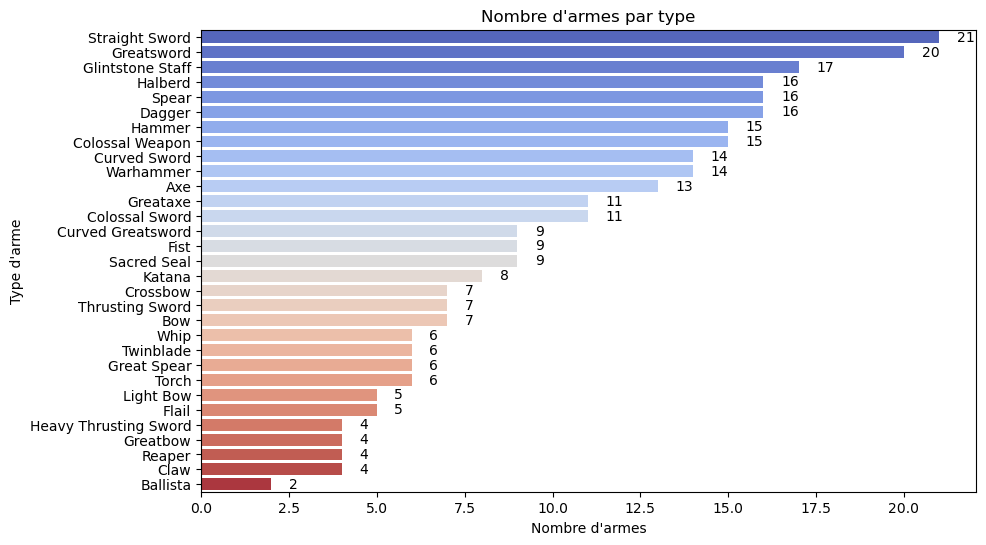

In [ ]:
armes_par_type = db["Type"].value_counts()

# Créer un graphique en barres horizontales
plt.figure(figsize=(10, 6))
sns.barplot(y=armes_par_type.index, x=armes_par_type.values, palette="coolwarm")

# Ajouter les labels et le titre
plt.ylabel("Weapon type")
plt.xlabel("Number of weapon")
plt.title("Number of weapon per type")

# Afficher le nombre d'armes sur chaque barre
for index, value in enumerate(armes_par_type.values):
    plt.text(value + 0.5, index, str(value), va="center", fontsize=10)

# Afficher le graphique
plt.show()

##### Weapon For Damage Type Quantity

In [9]:
def afficher_pie_chart(damage_type):
    db[damage_type] = pd.to_numeric(db[damage_type], errors="coerce")

    # Filtrer les armes ayant des dégâts > 0 pour le type sélectionné
    filtered_db = db[db[damage_type] > 0]
    
    # Calculer les pourcentages par type d'arme
    type_counts = filtered_db["Type"].value_counts(normalize=True) * 100  # Pourcentage
    
    # Créer le diagramme circulaire
    plt.figure(figsize=(8, 8))
    plt.pie(type_counts, labels=type_counts.index, autopct="%1.1f%%", startangle=140, 
        colors=plt.cm.Paired.colors, wedgeprops={"linewidth": 1, "edgecolor": "white"})
    plt.title(f"Weapon pourcentage for {damage_type}")
    plt.show()

# Dropdown interactif
damage_types = ["Physic Damage", "Magic Damage", "Fire Damage", "Light Damage", "Holy Damage"]  # Trouver les colonnes de dégâts
dropdown = widgets.Dropdown(options=damage_types, description="Damage Type:", style={'description_width': 'initial'})

# Interface interactive
widgets.interactive(afficher_pie_chart, damage_type=dropdown)

interactive(children=(Dropdown(description='Damage Type:', options=('Physic Damage', 'Magic Damage', 'Fire Dam…